In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')


In [33]:
df = pd.read_excel("Tableau Sample Sales Data.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
df.shape

(9994, 21)

#### PART 1
Explanatory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


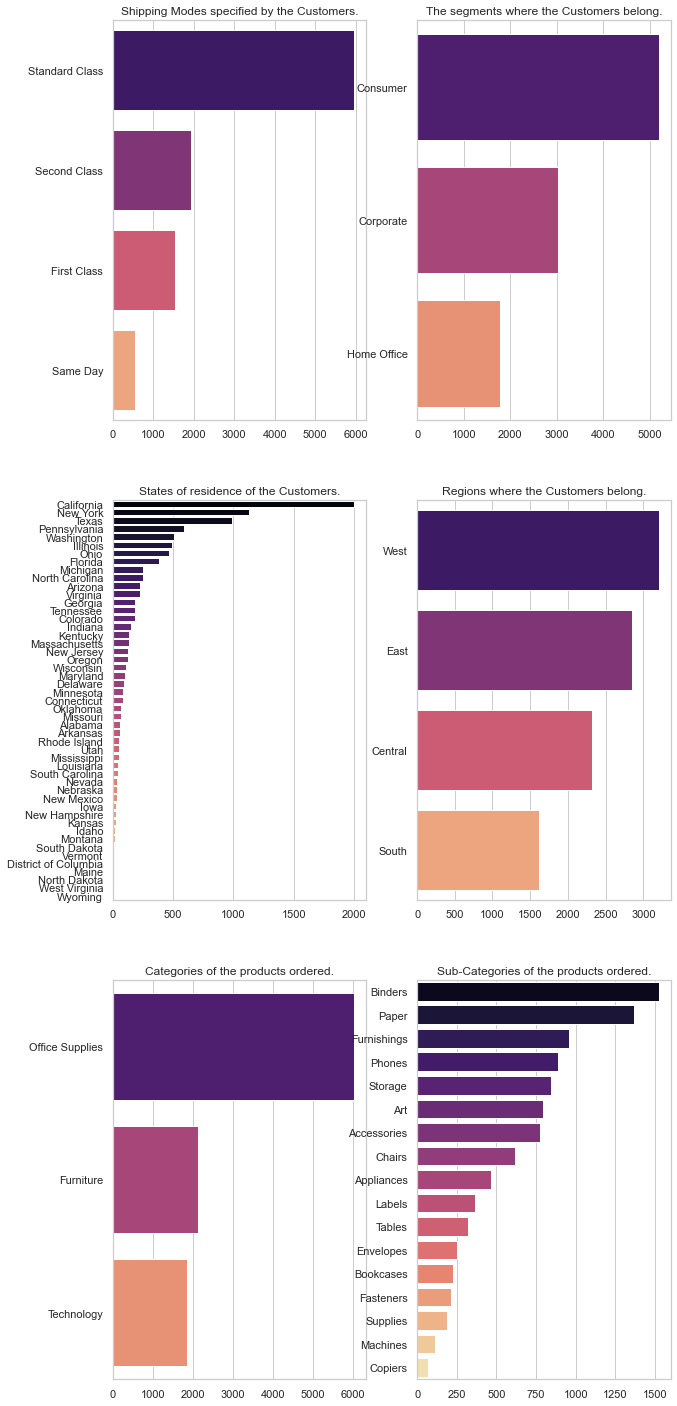

In [8]:
categories = ['Ship Mode','Segment','State','Region', 'Category','Sub-Category']
indexrange = [1,2,3,4,5,6]
cat_class = []
y = []
x = []
title = ['Shipping Modes specified by the Customers.','The segments where the Customers belong.',
         'States of residence of the Customers.','Regions where the Customers belong.',
         'Categories of the products ordered.','Sub-Categories of the products ordered.']
for i in range(6):
    i = df[categories[i]].value_counts()
    cat_class.append(i)
plt.figure(figsize = (10,25))
for i in range(6):
    y.append(cat_class[i].index)
    x.append(cat_class[i].values)
    plt.subplot(3,2,indexrange[i])
    sns.barplot(x=x[i], y=y[i], palette='magma')
    plt.title(title[i])


In [9]:
Sales_shipdf = df.groupby(['State','Ship Mode']).aggregate({'Sales':'mean'}).reset_index()
Sales_shipdf = Sales_shipdf.pivot(index='State', columns='Ship Mode', values='Sales').reset_index()
Sales_shipdf['total'] = Sales_shipdf['First Class']+Sales_shipdf['Same Day']+Sales_shipdf['Second Class']+Sales_shipdf['Standard Class']

Sales_shipdf = Sales_shipdf.sort_values(by = 'total', ascending = False)
Sales_shipdf.drop(columns ='total', inplace=True)
Sales_shipdf.head()


Ship Mode,State,First Class,Same Day,Second Class,Standard Class
26,Nevada,392.239600,475.944000,567.149667,356.484000
31,North Carolina,159.149263,875.506929,248.553333,173.284871
20,Michigan,520.668857,230.780222,356.993813,262.177506
12,Indiana,194.193125,483.973333,276.516857,413.876421
34,Oklahoma,356.334000,519.794286,184.144286,276.045745


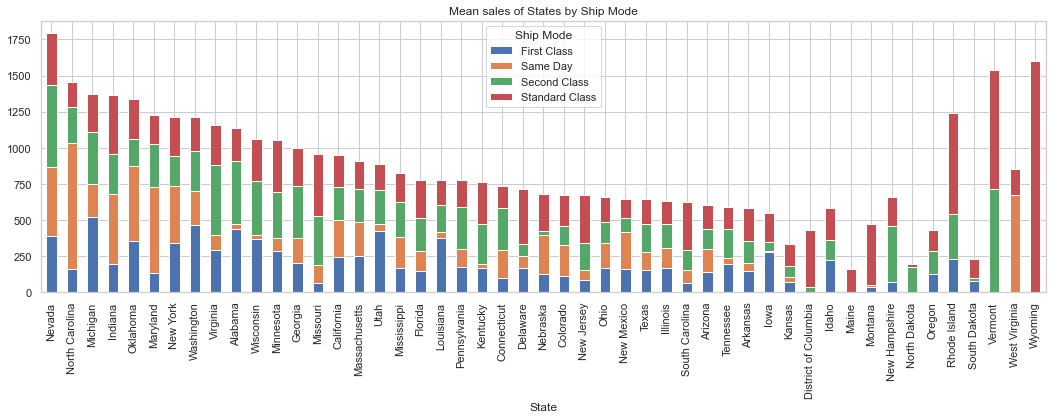

In [10]:
Sales_shipdf.set_index('State').plot(kind = 'bar', figsize = (18,5), stacked = True)
plt.title('Mean sales of States by Ship Mode')
plt.show()

In [11]:
sub_df = df.groupby(['State','Sub-Category']).aggregate({'Sales':'mean'}).reset_index()
sub_df = sub_df.pivot(index = 'State', columns = 'Sub-Category', values = 'Sales').reset_index()
sub_df['total'] = sub_df[['Accessories','Appliances','Art','Binders','Bookcases','Chairs','Copiers','Envelopes', 'Fasteners','Furnishings','Labels','Machines','Paper','Phones','Storage','Supplies','Tables']].sum()
sub_df.head()

Sub-Category,State,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,total
0,Alabama,387.138333,208.160000,43.030000,46.682000,NaN,783.108000,899.970000,52.920000,3.620000,13.493333,253.245000,3040.000000,110.377500,451.046667,416.470000,242.255000,792.153333,NaN
1,Arizona,154.370909,129.072000,99.225143,62.438657,173.071000,406.192500,NaN,30.645714,16.872000,119.602286,9.154667,321.983000,78.734194,321.251130,123.351619,70.632000,443.927778,NaN
2,Arkansas,162.585455,NaN,13.050000,288.983000,638.820000,836.640000,NaN,103.900000,21.335000,114.698000,7.310000,NaN,67.126667,534.202500,215.000000,NaN,301.960000,NaN
3,California,253.435442,257.190638,33.307030,103.163652,529.971567,485.225908,1444.677647,70.376957,11.417381,104.693613,34.929398,1282.261565,57.985986,395.142651,281.951813,365.603488,639.862423,NaN
4,Colorado,152.532800,151.921778,19.147636,18.177429,175.947000,588.915429,439.992000,15.120000,11.130000,81.565333,8.980000,1104.563000,46.485053,307.791000,260.551385,280.680000,364.282500,NaN


In [12]:
pf_seg_df = df.groupby(['State','Segment']).aggregate({'Profit':'mean'}).reset_index()
pf_seg_df = pf_seg_df.pivot(index='State', columns='Segment', values='Profit').reset_index()
pf_seg_df['total'] = pf_seg_df['Consumer']+pf_seg_df['Corporate']+pf_seg_df['Home Office']

pf_seg_df = pf_seg_df.sort_values(by = 'total', ascending = False)
pf_seg_df.drop(columns ='total', inplace=True)
pf_seg_df.head()

Segment,State,Consumer,Corporate,Home Office
43,Vermont,75.023200,306.645460,336.635000
12,Indiana,55.153593,299.846849,58.942949
23,Missouri,30.475097,193.666453,182.550769
37,Rhode Island,41.127433,54.708805,275.991645
26,Nevada,40.759328,59.706515,225.864162


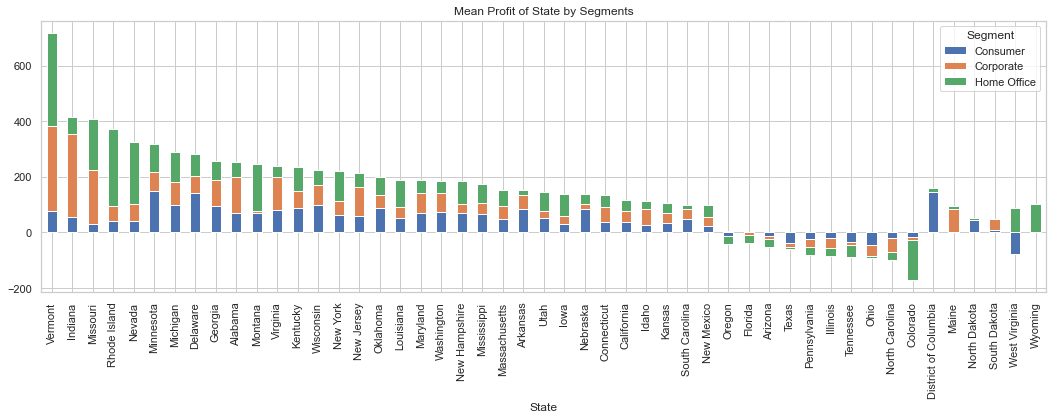

In [13]:
pf_seg_df.set_index('State').plot(kind = 'bar', figsize = (18,5), stacked = True)
plt.title("Mean Profit of State by Segments")
plt.show()

In [14]:
q_r_df = df.groupby(['State','Ship Mode']).aggregate({'Quantity':'sum'}).reset_index()
q_r_df = q_r_df.pivot(index='State', columns='Ship Mode', values='Quantity').reset_index()
q_r_df['total'] = q_r_df['First Class']+q_r_df['Same Day']+q_r_df['Second Class']+q_r_df['Standard Class']


q_r_df = q_r_df.sort_values(by = 'total', ascending = False)
q_r_df.drop(columns ='total', inplace=True)
q_r_df.head()


Ship Mode,State,First Class,Same Day,Second Class,Standard Class
3,California,1233.0,404.0,1475.0,4555.0
30,New York,651.0,250.0,768.0,2555.0
41,Texas,560.0,158.0,718.0,2288.0
36,Pennsylvania,399.0,69.0,353.0,1332.0
45,Washington,211.0,152.0,372.0,1148.0


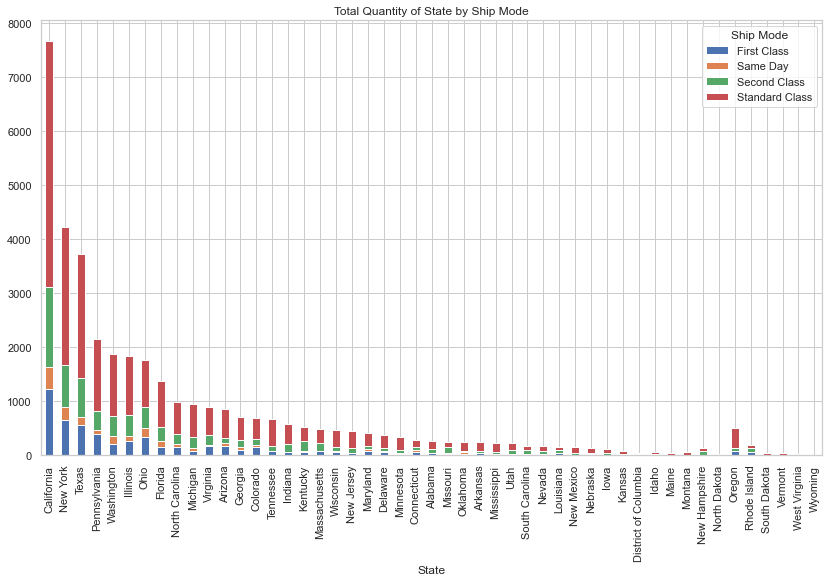

In [15]:
q_r_df.set_index('State').plot(kind = 'bar', figsize = (14,8), stacked = True)
plt.title("Total Quantity of State by Ship Mode")
plt.show()

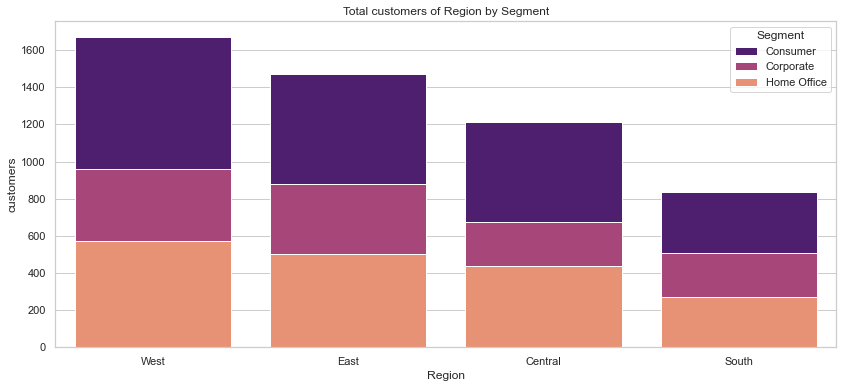

In [16]:
plt.figure(figsize=(14,6))
region_df = df.groupby(['Region', 'Segment']).size().reset_index().rename(columns= {0:'customers'}).sort_values('customers', ascending = False)
region_df.pivot(columns = 'Region', index = 'Segment', values = 'customers')
sns.barplot(x='Region', y='customers', data=region_df, palette='magma', hue='Segment',dodge = False)
plt.title("Total customers of Region by Segment")
plt.show()

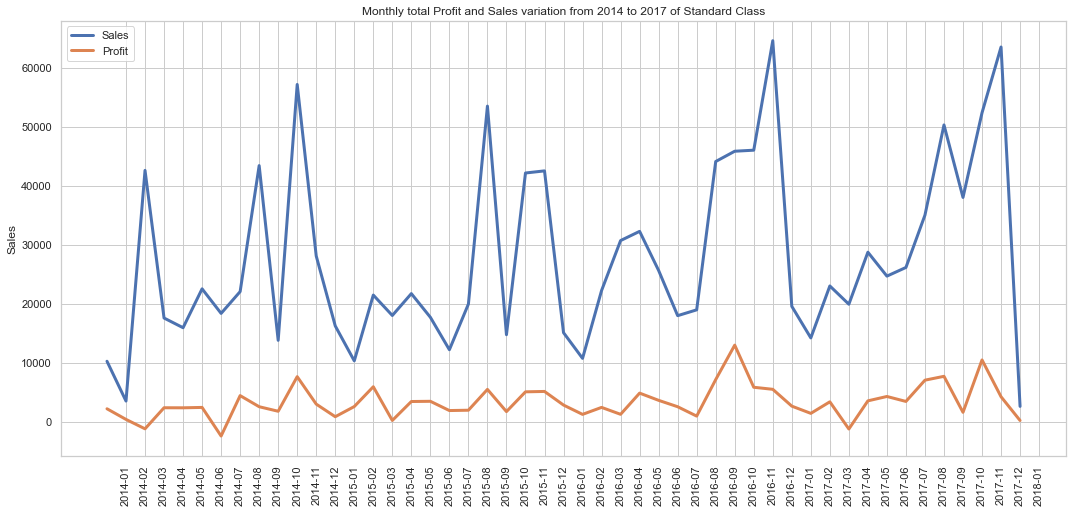

In [17]:
stndclz_df = df.loc[df['Ship Mode'] == 'Standard Class']
stndclz_df = stndclz_df[['Ship Date', 'Sales', 'Profit']].sort_values(by='Ship Date')
stndclz_df['monthyr'] = pd.to_datetime(stndclz_df['Ship Date']).dt.to_period('M')
stndclz_df = stndclz_df.groupby('monthyr').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

plt.figure(figsize=(18,8))
sns.lineplot(x = stndclz_df.index, y = 'Sales', data = stndclz_df, label = 'Sales', linewidth = 3)
sns.lineplot(x = stndclz_df.index, y = 'Profit', data = stndclz_df, label = 'Profit', linewidth = 3)

labels = stndclz_df['monthyr'].values
plt.xticks(range(1,stndclz_df.shape[0]+1), labels=labels)
plt.xticks(rotation=90)
plt.title('Monthly total Profit and Sales variation from 2014 to 2017 of Standard Class')
plt.show()


California State which was the having most customers.

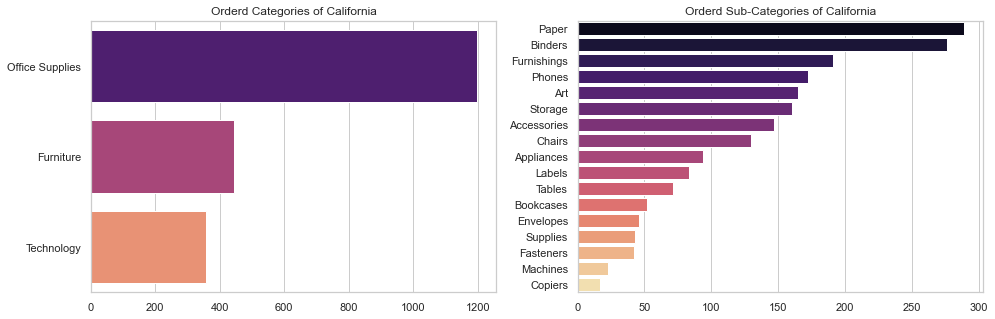

In [18]:
california_df = df.loc[df['State'] == 'California']

plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.barplot(x = california_df['Sub-Category'].value_counts().values, 
            y = california_df['Sub-Category'].value_counts().index, palette='magma')
plt.title('Orderd Sub-Categories of California')

plt.subplot(1,2,1)
sns.barplot(x = california_df['Category'].value_counts().values, 
            y = california_df['Category'].value_counts().index, palette='magma')
plt.title('Orderd Categories of California')

plt.show()

#### PART 2 
Feature Engineering

In [19]:
df_drop = df.drop(['Row ID', 'Order ID','City', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',  'Country', 'Postal Code',  'Product ID','Product Name'], axis=1)

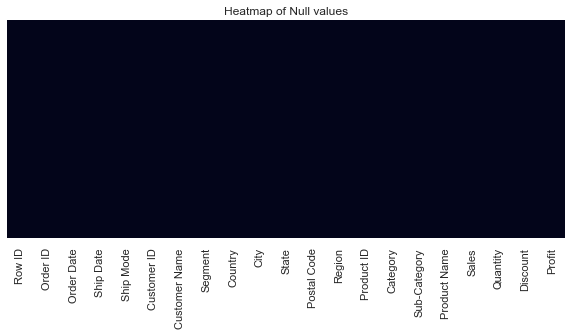

In [20]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)
plt.title('Heatmap of Null values')
plt.show()

In [21]:
df_drop.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
scaler = StandardScaler()

scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    df_drop[i] = scaler.fit_transform(df_drop[[i]])

In [23]:
lablecol = df_drop[['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category']]
dummi = pd.get_dummies(lablecol,drop_first=True)

In [24]:
df_drop = pd.concat([df_drop,dummi], axis=1)
df_drop = df_drop.drop(['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category'], axis=1)
df_drop.head()

,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0.051510,-0.804303,-0.756643,0.056593,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.805633,-0.354865,-0.756643,0.815054,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.345368,-0.804303,-0.756643,-0.093002,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.167688,0.544012,1.423149,-1.757484,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.332935,-0.804303,0.212153,-0.111593,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
y = df_drop['Profit']
x = df_drop.drop(['Profit'], axis=1)
x.shape, y.shape

((9994, 77), (9994,))

In [26]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=3)

In [27]:
models = ['SVR','Ridge', 'LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor']

svr_model = SVR(kernel='rbf').fit(x_train,y_train)
ridge_model = Ridge().fit(x_train,y_train)
lr_model = LinearRegression().fit(x_train,y_train)
rf_model = RandomForestRegressor(n_estimators=10, random_state=0).fit(x_train,y_train)
dt_model = DecisionTreeRegressor(random_state=0).fit(x_train,y_train)

svr_pred = svr_model.predict(x_test)
ridge_pred = ridge_model.predict(x_test)
lr_pred = lr_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)

R2_values = [r2_score(y_test,svr_pred),r2_score(y_test,ridge_pred),
             r2_score(y_test,lr_pred),r2_score(y_test,rf_pred),r2_score(y_test,dt_pred)]

In [28]:
R2_values = sorted(R2_values, reverse=True)
R2_values[0]

0.8281626917737197

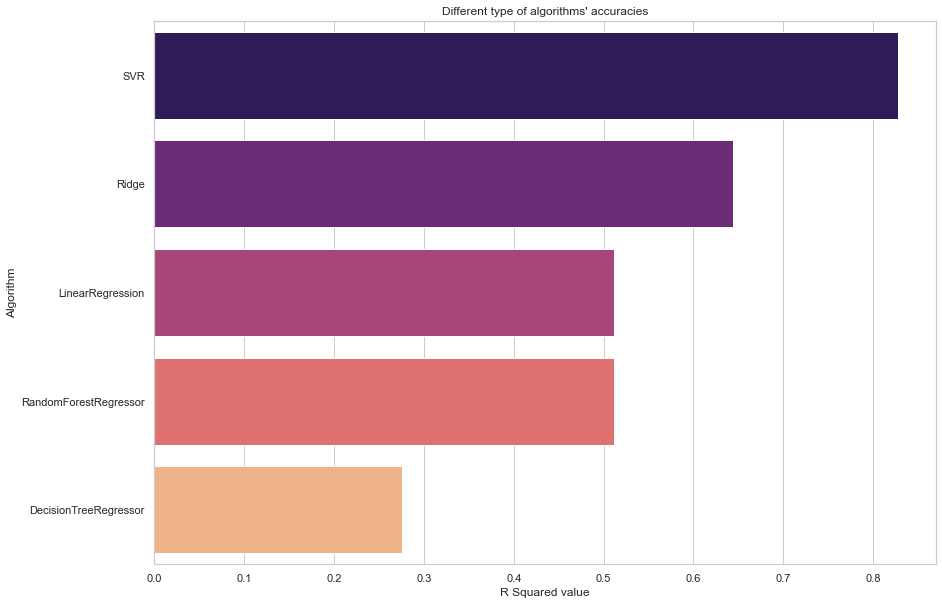

In [29]:
plt.figure(figsize=(14,10))
sns.barplot(y = models, x = R2_values, palette = 'magma')
plt.title("Different type of algorithms' accuracies")
plt.xlabel('R Squared value')
plt.ylabel('Algorithm')
plt.show()

In [30]:
n_estimates_rndm_st = np.arange(10,100,10)
estimater_values = []

for i in n_estimates_rndm_st:
    rfr_selected_model = RandomForestRegressor(n_estimators=i, random_state=i).fit(x_train,y_train)
    rfr_pred = rfr_selected_model.predict(x_test)
    estimater_values.append(r2_score(y_test,rfr_pred))

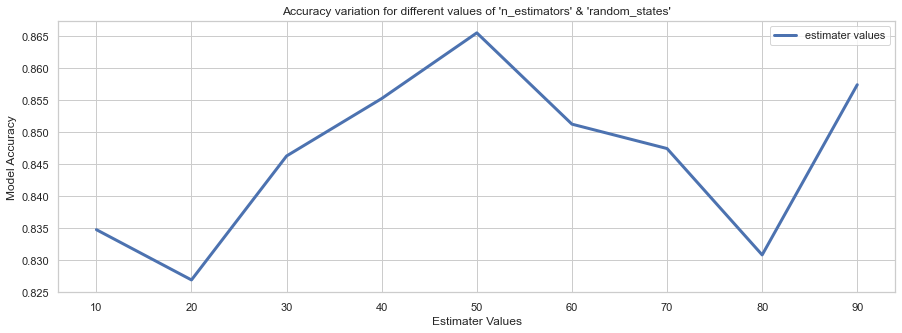

In [31]:
plt.figure(figsize=(15,5))

sns.lineplot(x = n_estimates_rndm_st, y = estimater_values, label = 'estimater values', linewidth = 3)
plt.title("Accuracy variation for different values of 'n_estimators' & 'random_states'")
plt.xlabel('Estimater Values')
plt.ylabel('Model Accuracy')
plt.show()

   ##### Conclusion
   So finaly it can be fitted as follow for n_estimators value and random_satate 10.

In [32]:
rfr_selected_model = RandomForestRegressor(n_estimators=10, random_state=10).fit(x_train,y_train)
rfr_pred = rfr_selected_model.predict(x_test)
print("Tuning model's Accuracy is " + str(round((r2_score(y_test,rfr_pred))* 100, 2))+'%')

Tuning model's Accuracy is 83.47%
